In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
artworks = pd.read_csv('../../repo/allwomen-da-bootcamp/data/artworks.csv')
artworks.dtypes

Artwork ID              int64
Title                  object
Artist ID              object
Name                   object
Date                   object
Medium                 object
Dimensions             object
Acquisition Date       object
Credit                 object
Catalogue              object
Department             object
Classification         object
Object Number          object
Diameter (cm)         float64
Circumference (cm)    float64
Height (cm)           float64
Length (cm)           float64
Width (cm)            float64
Depth (cm)            float64
Weight (kg)           float64
Duration (s)          float64
dtype: object

In [3]:
artworks.head()

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN


In [4]:
artworks['Date'].isna().sum()

2312

In [5]:
artworks['Date'].unique()

array(['1896', '1987', '1903', ..., 'September 8, 1962', '1954–1956',
       '1955–1967'], dtype=object)

In [6]:
#Find all values in the 'Date' column that contain 4 digits (first match) and replace the rest of the values with NaN
mask = artworks['Date'].str.contains(r'\d{4}', na = False)
artworks.loc[~mask, 'Date'] = np.nan
artworks['Date'].isna().sum()

3451

In [7]:
#Extract sequence of four digits from each 'Date' value and replace the entire string with first group reference
year_regexp = r'^.*?(\d{4}).*?$'
artworks['Date'] = artworks['Date'].str.replace(year_regexp, r'\1', regex=True)
artworks['Date'].unique()

array(['1896', '1987', '1903', '1980', '1976', '1968', '1900', '1978',
       '1905', '1906', '1979', '1918', '1970', '1975', '1984', '1986',
       '1974', nan, '1917', '1923', '1930', '1936', '1935', '1937',
       '1938', '1977', '1958', '1985', '1989', '1949', '1991', '1941',
       '1965', '1981', '1983', '1992', '1915', '1953', '1910', '1982',
       '1945', '1990', '1995', '1927', '1929', '1964', '1959', '1939',
       '1993', '1996', '1988', '1952', '1921', '1957', '1972', '1956',
       '1924', '1962', '1925', '1960', '1969', '1963', '1994', '1961',
       '1933', '1967', '1934', '1940', '1946', '1955', '1997', '1922',
       '1942', '1954', '1916', '1973', '1926', '1932', '1947', '1943',
       '1944', '1966', '1971', '1999', '1951', '1913', '1928', '1886',
       '1920', '1950', '1931', '1901', '1948', '1912', '1908', '1902',
       '1904', '1998', '1898', '1875', '1880', '1909', '1501', '1897',
       '1907', '1895', '1914', '1885', '1768', '1878', '1808', '1865',
       '1

In [8]:
#Change 'Date' column type from object to Int64 (keep NaN values) and check if applied
artworks['Date'] = artworks['Date'].astype('Int64')
artworks.dtypes

Artwork ID              int64
Title                  object
Artist ID              object
Name                   object
Date                    Int64
Medium                 object
Dimensions             object
Acquisition Date       object
Credit                 object
Catalogue              object
Department             object
Classification         object
Object Number          object
Diameter (cm)         float64
Circumference (cm)    float64
Height (cm)           float64
Length (cm)           float64
Width (cm)            float64
Depth (cm)            float64
Weight (kg)           float64
Duration (s)          float64
dtype: object

In [9]:
#Change the 'Date' column name to 'Year'
artworks.rename(columns = {'Date': 'Year'}, inplace = True)
artworks

,Artwork ID,Title,Artist ID,Name,Year,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130257,217983,Seul/NY/MAX,4469,Nam June Paik,<NA>,VHS,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5038,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130258,217984,Fluxus-Manifestatie in en Rond Kunsthandel Monet,NaN,NaN,1962,VHS,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5039,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130259,217985,Fluxphone Compositions,67695,Ely Ramen,1969,Cassette,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5040,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130260,217986,Unidentified,NaN,NaN,<NA>,Cassette,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5041,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN


In [10]:
#Check what unique values are in the 'Acquisition Date' column
artworks['Acquisition Date'].unique()

array(['1996-04-09', '1995-01-17', '1997-01-15', ..., '1216-10-18',
       '2016-10', '2016-05'], dtype=object)

In [11]:
#Keep only years in the 'Acquisition Date' column
artworks['Acquisition Date'] = artworks['Acquisition Date'].str.split('-').str[0]

In [12]:
#Change 'Acquisition Date' column type from object to Int64 (keep NaN values) and check if applied
artworks['Acquisition Date'] = artworks['Acquisition Date'].astype('Int64')
artworks.dtypes

Artwork ID              int64
Title                  object
Artist ID              object
Name                   object
Year                    Int64
Medium                 object
Dimensions             object
Acquisition Date        Int64
Credit                 object
Catalogue              object
Department             object
Classification         object
Object Number          object
Diameter (cm)         float64
Circumference (cm)    float64
Height (cm)           float64
Length (cm)           float64
Width (cm)            float64
Depth (cm)            float64
Weight (kg)           float64
Duration (s)          float64
dtype: object

In [13]:
#Change the 'Acquisition Date' column name to 'Acquisition Year'
artworks.rename(columns = {'Acquisition Date': 'Acquisition Year'}, inplace = True)

In [14]:
artworks['Acquisition Year'].isna().sum()

5463

In [15]:
artworks = artworks.dropna(subset=['Acquisition Year'])

In [16]:
artworks['Acquisition Year'] = artworks['Acquisition Year'].astype('int64')

Outliers in Acquisition Year:
        Artwork ID                      Title Artist ID       Name  Year  \
129661      215774  Songs for Swinging Larvae     34673  Residents  1982   

       Medium Dimensions  Acquisition Year              Credit Catalogue  ...  \
129661  Video        NaN              1216  Gift of the Artist         N  ...   

       Classification Object Number Diameter (cm)  Circumference (cm)  \
129661          Video        818629           NaN                 NaN   

        Height (cm)  Length (cm)  Width (cm)  Depth (cm)  Weight (kg)  \
129661          NaN          NaN         NaN         NaN          NaN   

        Duration (s)  
129661           NaN  

[1 rows x 21 columns]


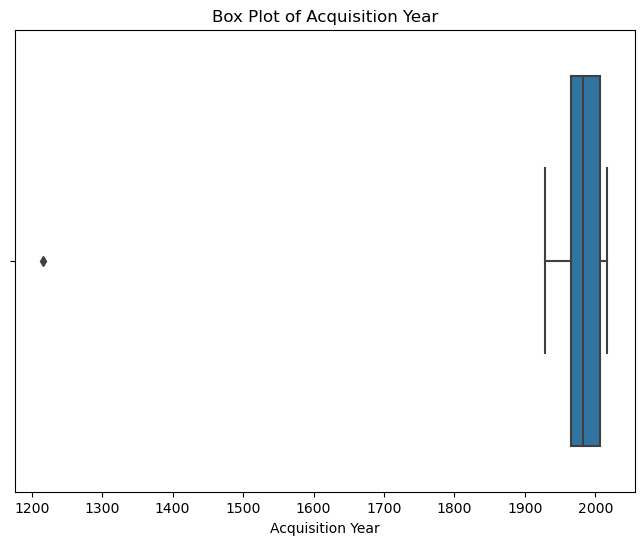

In [17]:
# Identify and visualize outliers
Q1 = artworks['Acquisition Year'].quantile(0.25)
Q3 = artworks['Acquisition Year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = artworks[(artworks['Acquisition Year'] < lower_bound) | (artworks['Acquisition Year'] > upper_bound)]

print("Outliers in Acquisition Year:")
print(outliers)

plt.figure(figsize=(8, 6))
sns.boxplot(x=artworks['Acquisition Year'])
plt.title('Box Plot of Acquisition Year')
plt.show()

In [18]:
artworks.drop(artworks[artworks['Acquisition Year'] == 1216].index, inplace = True)

In [19]:
artworks.groupby('Acquisition Year').size()

Acquisition Year
1929       9
1930       8
1931       3
1932      18
1933      95
        ... 
2012    3462
2013    3231
2014    2675
2015    3902
2016    1901
Length: 88, dtype: int64

In [20]:
# Check dataset for duplicates
duplicated_rows = artworks[artworks.duplicated()]
duplicated_rows

,Artwork ID,Title,Artist ID,Name,Year,Medium,Dimensions,Acquisition Year,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)


In [21]:
artworks['Artist ID'].isna().sum()

1305

In [22]:
# Drop all the rows with NaN artist ID
artworks = artworks.dropna(subset=['Artist ID'])

In [23]:
# Save all collective artworks (all rows that contain several artist IDs) and drop them 
collective_artworks = artworks['Artist ID'].str.contains(',')

In [24]:
artworks = artworks.drop(artworks[collective_artworks].index)
artworks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117242 entries, 0 to 130261
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Artwork ID          117242 non-null  int64  
 1   Title               117218 non-null  object 
 2   Artist ID           117242 non-null  object 
 3   Name                117242 non-null  object 
 4   Year                114560 non-null  Int64  
 5   Medium              106200 non-null  object 
 6   Dimensions          107176 non-null  object 
 7   Acquisition Year    117242 non-null  int64  
 8   Credit              114738 non-null  object 
 9   Catalogue           117242 non-null  object 
 10  Department          117242 non-null  object 
 11  Classification      117242 non-null  object 
 12  Object Number       117242 non-null  object 
 13  Diameter (cm)       1216 non-null    float64
 14  Circumference (cm)  9 non-null       float64
 15  Height (cm)         101078 non-nul

In [25]:
artworks['Artist ID'] = artworks['Artist ID'].astype('int64')
artworks.dtypes

Artwork ID              int64
Title                  object
Artist ID               int64
Name                   object
Year                    Int64
Medium                 object
Dimensions             object
Acquisition Year        int64
Credit                 object
Catalogue              object
Department             object
Classification         object
Object Number          object
Diameter (cm)         float64
Circumference (cm)    float64
Height (cm)           float64
Length (cm)           float64
Width (cm)            float64
Depth (cm)            float64
Weight (kg)           float64
Duration (s)          float64
dtype: object

In [26]:
artists = pd.read_csv('../../repo/allwomen-da-bootcamp/data/artists.csv', index_col=0)
artists.dtypes

Artist ID        int64
Name            object
Nationality     object
Gender          object
Birth Year     float64
Death Year     float64
dtype: object

In [27]:
artists.shape

(15091, 6)

In [28]:
artists['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [29]:
artists['Gender'].isna().sum()

3072

In [30]:
artists_duplicated = artists[artists.duplicated()]
artists_duplicated

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year


In [31]:
artists['Birth Year'] = artists['Birth Year'].astype('Int64')

In [32]:
artists['Death Year'] = artists['Death Year'].astype('Int64')

In [33]:
artists.dtypes

Artist ID       int64
Name           object
Nationality    object
Gender         object
Birth Year      Int64
Death Year      Int64
dtype: object

In [34]:
# Merge artworks and artists dataframes
df = artworks.merge(artists, how='left', on='Artist ID')
df

,Artwork ID,Title,Artist ID,Name_x,Year,Medium,Dimensions,Acquisition Year,Credit,Catalogue,...,Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s),Name_y,Nationality,Gender,Birth Year,Death Year
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996,Fractional and promised gift of Jo Carole and ...,Y,...,NaN,168.9000,NaN,NaN,NaN,Otto Wagner,Austrian,Male,1841,1918
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995,Gift of the architect in honor of Lily Auchinc...,Y,...,NaN,29.8451,NaN,NaN,NaN,Christian de Portzamparc,French,Male,1944,<NA>
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997,Gift of Jo Carole and Ronald S. Lauder,Y,...,NaN,31.8000,NaN,NaN,NaN,Emil Hoppe,Austrian,Male,1876,1957
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995,Purchase and partial gift of the architect in ...,Y,...,NaN,50.8000,NaN,NaN,NaN,Bernard Tschumi,NaN,Male,1944,<NA>
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997,Gift of Jo Carole and Ronald S. Lauder,Y,...,NaN,19.1000,NaN,NaN,NaN,Emil Hoppe,Austrian,Male,1876,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117237,217980,"Requiem for Wagner The Criminal Mayor - ""Eggs""...",2637,Dick Higgins,<NA>,NaN,NaN,2008,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,NaN,0.0000,0.0,NaN,NaN,Dick Higgins,American,Male,1938,1998
117238,217982,Study No. 3,4469,Nam June Paik,<NA>,VHS,NaN,2008,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,NaN,0.0000,0.0,NaN,NaN,Nam June Paik,American,Male,1932,2006
117239,217983,Seul/NY/MAX,4469,Nam June Paik,<NA>,VHS,NaN,2008,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,NaN,0.0000,0.0,NaN,NaN,Nam June Paik,American,Male,1932,2006
117240,217985,Fluxphone Compositions,67695,Ely Ramen,1969,Cassette,NaN,2008,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,NaN,0.0000,0.0,NaN,NaN,Ely Ramen,NaN,NaN,<NA>,<NA>


In [35]:
df.columns

Index(['Artwork ID', 'Title', 'Artist ID', 'Name_x', 'Year', 'Medium',
       'Dimensions', 'Acquisition Year', 'Credit', 'Catalogue', 'Department',
       'Classification', 'Object Number', 'Diameter (cm)',
       'Circumference (cm)', 'Height (cm)', 'Length (cm)', 'Width (cm)',
       'Depth (cm)', 'Weight (kg)', 'Duration (s)', 'Name_y', 'Nationality',
       'Gender', 'Birth Year', 'Death Year'],
      dtype='object')

In [36]:
reordered_columns = ['Artist ID', 'Name_x', 'Nationality', 'Gender', 'Birth Year', 'Death Year', 'Artwork ID', 'Title', 'Year', 'Medium', 'Dimensions', 'Diameter (cm)', 'Circumference (cm)', 'Height (cm)', 'Length (cm)', 'Width (cm)', 'Depth (cm)', 'Weight (kg)', 'Duration (s)', 'Classification', 'Object Number', 'Catalogue', 'Department', 'Acquisition Year', 'Credit']
df = df[reordered_columns]

In [37]:
df.rename(columns = {'Name_x' : 'Artist Name'}, inplace = True)
df

,Artist ID,Artist Name,Nationality,Gender,Birth Year,Death Year,Artwork ID,Title,Year,Medium,...,Width (cm),Depth (cm),Weight (kg),Duration (s),Classification,Object Number,Catalogue,Department,Acquisition Year,Credit
0,6210,Otto Wagner,Austrian,Male,1841,1918,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",1896,Ink and cut-and-pasted painted pages on paper,...,168.9000,NaN,NaN,NaN,Architecture,885.1996,Y,Architecture & Design,1996,Fractional and promised gift of Jo Carole and ...
1,7470,Christian de Portzamparc,French,Male,1944,<NA>,3,"City of Music, National Superior Conservatory ...",1987,Paint and colored pencil on print,...,29.8451,NaN,NaN,NaN,Architecture,1.1995,Y,Architecture & Design,1995,Gift of the architect in honor of Lily Auchinc...
2,7605,Emil Hoppe,Austrian,Male,1876,1957,4,"Villa near Vienna Project, Outside Vienna, Aus...",1903,"Graphite, pen, color pencil, ink, and gouache ...",...,31.8000,NaN,NaN,NaN,Architecture,1.1997,Y,Architecture & Design,1997,Gift of Jo Carole and Ronald S. Lauder
3,7056,Bernard Tschumi,NaN,Male,1944,<NA>,5,"The Manhattan Transcripts Project, New York, N...",1980,Photographic reproduction with colored synthet...,...,50.8000,NaN,NaN,NaN,Architecture,2.1995,Y,Architecture & Design,1995,Purchase and partial gift of the architect in ...
4,7605,Emil Hoppe,Austrian,Male,1876,1957,6,"Villa, project, outside Vienna, Austria, Exter...",1903,"Graphite, color pencil, ink, and gouache on tr...",...,19.1000,NaN,NaN,NaN,Architecture,2.1997,Y,Architecture & Design,1997,Gift of Jo Carole and Ronald S. Lauder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117237,2637,Dick Higgins,American,Male,1938,1998,217980,"Requiem for Wagner The Criminal Mayor - ""Eggs""...",<NA>,NaN,...,0.0000,0.0,NaN,NaN,Media,FC5035,N,Fluxus Collection,2008,The Gilbert and Lila Silverman Fluxus Collecti...
117238,4469,Nam June Paik,American,Male,1932,2006,217982,Study No. 3,<NA>,VHS,...,0.0000,0.0,NaN,NaN,Media,FC5037,N,Fluxus Collection,2008,The Gilbert and Lila Silverman Fluxus Collecti...
117239,4469,Nam June Paik,American,Male,1932,2006,217983,Seul/NY/MAX,<NA>,VHS,...,0.0000,0.0,NaN,NaN,Media,FC5038,N,Fluxus Collection,2008,The Gilbert and Lila Silverman Fluxus Collecti...
117240,67695,Ely Ramen,NaN,NaN,<NA>,<NA>,217985,Fluxphone Compositions,1969,Cassette,...,0.0000,0.0,NaN,NaN,Media,FC5040,N,Fluxus Collection,2008,The Gilbert and Lila Silverman Fluxus Collecti...


In [38]:
# Save the clean dataset to a new file
df.to_csv('../../repo/allwomen-da-bootcamp/data/moma.csv')